In [1]:
!pip install nltk

In [2]:
import nltk

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
import pandas as pd
import numpy as np
from nltk import ngrams
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.svm import SVC

In [15]:
df = pd.read_csv("/content/ISEAR.csv", header=None)
df.head()

,0,1,2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [17]:
col = [0,1]
new_df = df [col]
new_df = new_df[pd.notnull(new_df[1])]
new_df.columns = ['emotion', 'text']
new_df.head()

,emotion,text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


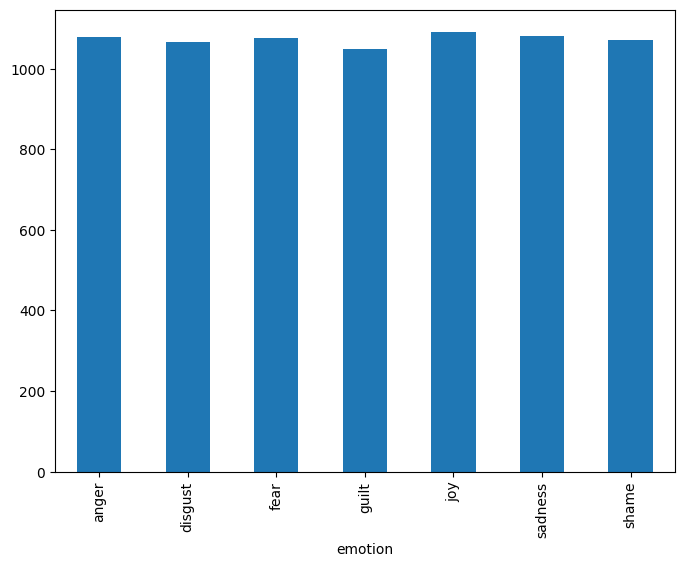

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
new_df.groupby('emotion').text.count().plot.bar(ylim=0)
plt.show()

In [19]:
def getTokenizedList(input_df):
    tokenizedList = []

    # Tokenizing the text
    for i in range(0, len(input_df)):
        curText = input_df['Text'].iloc[i]
        curText = curText.replace('\n', '')
        curTokenized = word_tokenize(curText)
        tokenizedList.append(curTokenized)

    # Removing punctuations
    tokenizedListWithoutPunct = []
    punctList = list(string.punctuation)

    for i in range(0, len(tokenizedList)):
        curList = tokenizedList[i]
        newList = []  # list without punctuations

        for word in curList:
            if word.lower() not in punctList:
                newList.append(word.lower())

        tokenizedListWithoutPunct.append(newList)

    # Stemming the words
    mystemmer = PorterStemmer()
    tokenizedStemmed = []

    for i in range(0, len(tokenizedListWithoutPunct)):
        curList = tokenizedListWithoutPunct[i]
        newList = []

        for word in curList:
            newList.append(mystemmer.stem(word))

        tokenizedStemmed.append(newList)

    return tokenizedStemmed

In [20]:
def transformSentence(sent):
    s = []
    sent = sent.replace('\n', '')
    sentTokenized = word_tokenize(sent)
    s.append(sentTokenized)

    sWithoutPunct = []
    punctList = list(string.punctuation)
    curSentList = s[0]
    newSentList = []

    for word in curSentList:
        if word.lower() not in punctList:
            newSentList.append(word.lower())

    sWithoutPunct.append(newSentList)

    mystemmer = PorterStemmer()
    tokenizedStemmed = []

    for i in range(len(sWithoutPunct)):
        curList = sWithoutPunct[i]
        newList = []

        for word in curList:
            newList.append(mystemmer.stem(word))

        tokenizedStemmed.append(newList)

    return tokenizedStemmed

In [21]:
data = {'Text': ["I am happy!", "I feel sad...", "Excited for tomorrow's event."],
        'Emotion': ["happy", "sad", "excited"]}
new_df = pd.DataFrame(data)

In [22]:
new_df['Text'] = getTokenizedList(new_df)

In [23]:
new_df = new_df[['Text', 'Emotion']]

In [24]:
print(new_df)

                                Text  Emotion
0                     [i, am, happi]    happy
1                [i, feel, sad, ...]      sad
2  [excit, for, tomorrow, 's, event]  excited


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(new_df["Text"], new_df['Emotion'], test_size=0.3, random_state=1)

In [26]:
def returnPhrase(inputList):
    return inputList

In [27]:
myVectorizer = TfidfVectorizer(analyzer='word',
                               tokenizer=returnPhrase,
                               preprocessor=returnPhrase,
                               token_pattern=None,
                               ngram_range=(1, 3))

myVectorizer.fit(X_train)

transformedTrain = myVectorizer.transform(X_train).toarray()
transformedTest = myVectorizer.transform(X_test).toarray()

In [28]:
SVMClassifier = SVC(kernel='linear')
SVMClassifier.fit(transformedTrain, Y_train)

SVC(kernel='linear')

In [29]:
curAlpha=0.33 #smoothing factor in NB
NBClassifier=MultinomialNB(alpha=curAlpha)
NBClassifier.fit(transformedTrain, Y_train)
myPredTest=NBClassifier.predict(transformedTest)
print('Best Acc Naive Bayes')
print(np.sum(myPredTest==Y_test)/len(Y_test))

Best Acc Naive Bayes
0.0


In [30]:
print('Metrics Classification Report: Naive Bayes')
print(metrics.classification_report(Y_test, myPredTest))

Metrics Classification Report: Naive Bayes
              precision    recall  f1-score   support

       happy       0.00      0.00      0.00       1.0
         sad       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [31]:
def predictSentNB(sent):
    sentPred = NBClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred

In [32]:
def predictSentSVM(sent):
    sentPred = SVMClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred

In [33]:
sent = "I love you to the moon and back"

print("Naive Bayes prediction")
print(predictSentNB(sent))

print("SVM prediction")
print(predictSentSVM(sent))

Naive Bayes prediction
['sad']
SVM prediction
['sad']


Menampilkan confusion matrix

Unique labels in Y_test: ['happy']
Unique labels in myPredTest: ['sad']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


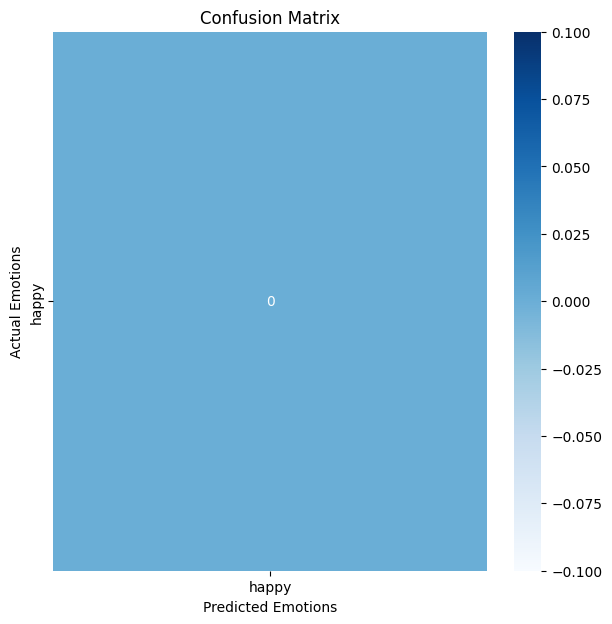

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cek label unik di Y_test dan myPredTest
print("Unique labels in Y_test:", Y_test.unique())
print("Unique labels in myPredTest:", np.unique(myPredTest))

# Labels untuk confusion matrix (hanya gunakan label yang ada di Y_test)
labels = Y_test.unique()

# Membuat confusion matrix dengan argumen keyword
cm = confusion_matrix(Y_test, myPredTest, labels=labels)

# Membuat plot untuk confusion matrix
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')

plt.ylabel('Actual Emotions')
plt.xlabel('Predicted Emotions')
plt.title('Confusion Matrix')
plt.show()

Belajar dengan data sembarang

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [37]:
penjualan = np.array([6, 5, 5, 4, 4, 3, 2, 2, 2, 1])
harga = np.array([16000, 18000, 27000, 34000, 50000, 68000, 65000, 81000, 85000, 90000])

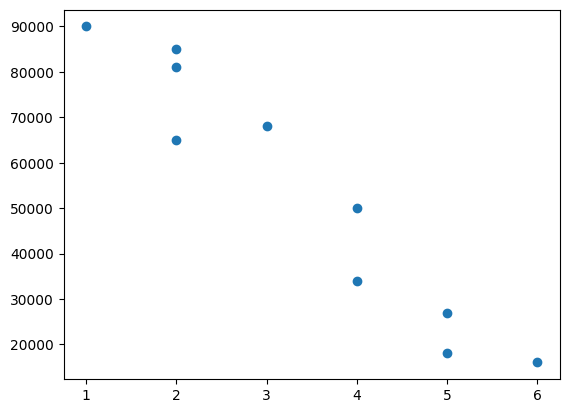

In [38]:
plt.scatter(penjualan, harga)

In [39]:
penjualan = penjualan.reshape(-1, 1)

linreg = LinearRegression()
linreg.fit(penjualan, harga)

LinearRegression()

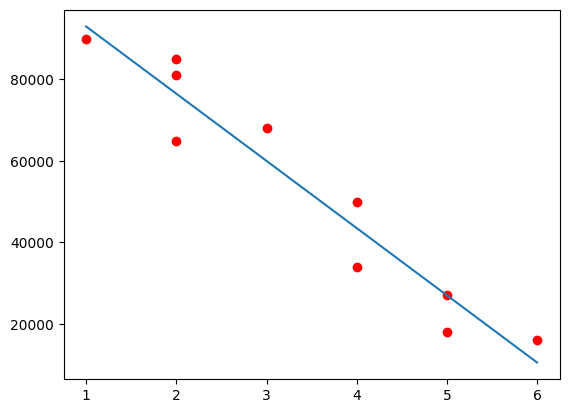

In [40]:
plt.scatter(penjualan, harga, color='red')
plt.plot(penjualan, linreg.predict(penjualan))

Latihan linear regresi dengan data set

In [42]:
df = pd.read_csv("/content/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [43]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


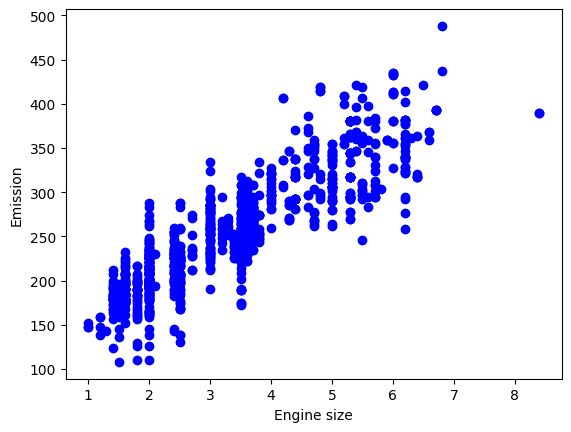

In [46]:
plt.scatter (cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

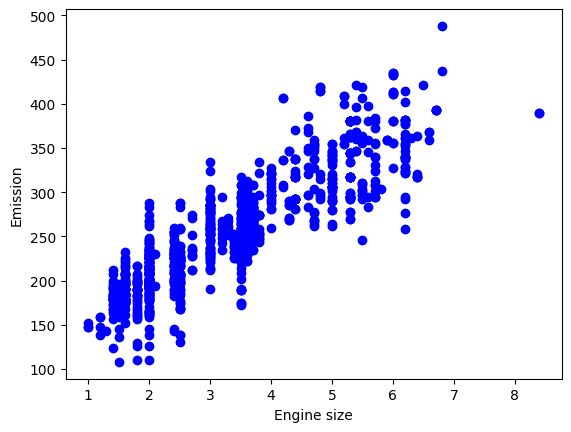

In [47]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [48]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

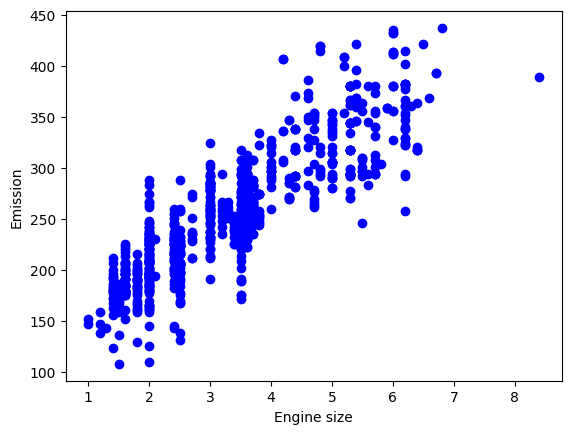

In [49]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [50]:
regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

print('Coefficients:', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients: [[38.9158403]]
Intercept:  [125.94627842]


Text(0, 0.5, 'Emission')

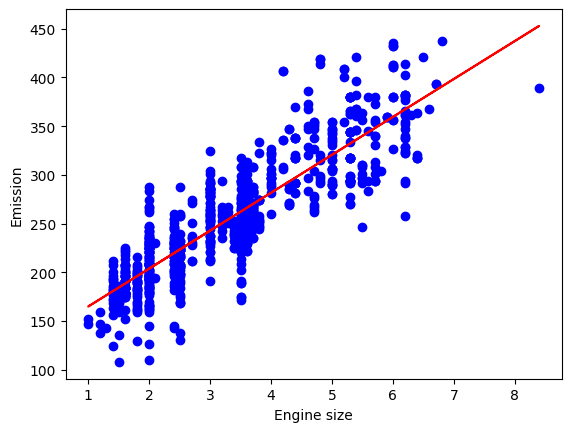

In [51]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [52]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean squared error: %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.15
Mean squared error: 963.51
R2-score: 0.72
